<a href="https://colab.research.google.com/github/CryptoRobotFr/General-code-trading-bot/blob/main/ratio_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python-binance

In [ ]:
# -- Import --
import pandas as pd
from binance.client import Client
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(15,8)})

# -- Define Binance Client --
client = Client()
df_list = {}

pair_list = ["BTCUSDT", "ETHUSDT", "BNBUSDT", "ADAUSDT", "XRPUSDT", "LTCUSDT", "ETCUSDT", "BCHUSDT", "LINKUSDT", "SOLUSDT"]
start_date = "01 january 2017"
time_interval = Client.KLINE_INTERVAL_1DAY

# -- You can change the crypto pair ,the start date and the time interval below --
for pair in pair_list:
    # -- Load all price data from binance API --
    klinesT = client.get_historical_klines(pair, time_interval, start_date)

    # -- Define your dataset --
    df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])

    df['close'] = pd.to_numeric(df['close'])
    df['high'] = pd.to_numeric(df['high'])
    df['low'] = pd.to_numeric(df['low'])
    df['open'] = pd.to_numeric(df['open'])

    # -- Set the date to index --
    df = df.set_index(df['timestamp'])
    df.index = pd.to_datetime(df.index, unit='ms')

    df.drop(
        columns=df.columns.difference(['open','high','low','close','volume']), 
        inplace=True
    )
    
    df["daily_return"] = df["close"] - df["open"]
    df["daily_return_pct"] = (df["close"] - df["open"]) / df["open"]
    # df["ath"] = df["close"].cummax()
    # df["drawdown"] = (df["close"] - df["ath"]) / df["ath"]
    
    df_list[pair] = df
    
df_list["BTCUSDT"]

,open,high,low,close,volume,daily_return,daily_return_pct
timestamp,,,,,,,
2017-08-17,4261.48,4485.39,4200.74,4285.08,795.15037700,23.60,0.005538
2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.88826400,-176.71,-0.041238
2017-08-19,4108.37,4184.69,3850.00,4139.98,381.30976300,31.61,0.007694
2017-08-20,4120.98,4211.08,4032.62,4086.29,467.08302200,-34.69,-0.008418
2017-08-21,4069.13,4119.62,3911.79,4016.00,691.74306000,-53.13,-0.013057
...,...,...,...,...,...,...,...
2022-09-01,20048.44,20208.37,19565.66,20131.46,245289.97263000,83.02,0.004141
2022-09-02,20132.64,20441.26,19755.29,19951.86,245986.60330000,-180.78,-0.008979
2022-09-03,19950.98,20055.93,19652.72,19831.90,146639.03204000,-119.08,-0.005969


,daily_return_pct,close
timestamp,,
2017-08-17,0.000843,1.000843
2017-08-18,-0.006786,0.994051
2017-08-19,-0.000049,0.994002
2017-08-20,0.002506,0.996494
2017-08-21,0.006782,1.003252
...,...,...
2022-09-01,0.021217,9.769563
2022-09-02,-0.000237,9.767244
2022-09-03,0.001427,9.781182


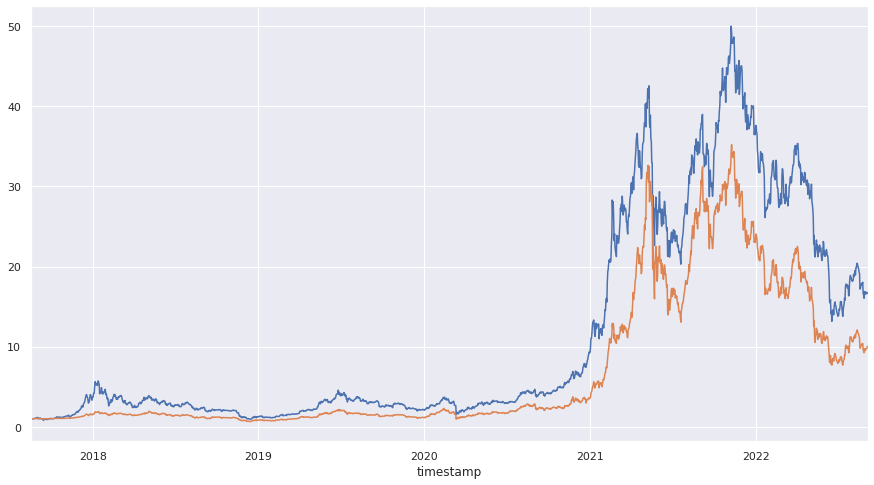

In [ ]:
portfolio_repart_1 = {
    "BTCUSDT": 0.5,
    "ETHUSDT": 0.3,
    "BNBUSDT": 0.2,
}

portfolio_repart_2 = {
    "BTCUSDT": 0.1,
    "ETHUSDT": 0.1,
    "BNBUSDT": 0.1,
    "ADAUSDT": 0.1,
    "XRPUSDT": 0.1,
    "LTCUSDT": 0.1,
    "ETCUSDT": 0.1,
    "BCHUSDT": 0.1,
    "LINKUSDT": 0.1,
    "SOLUSDT": 0.1,
}

portfolio_daily_return = 0
for pair in portfolio_repart_1:
    portfolio_daily_return = (df_list[pair]["daily_return_pct"] * portfolio_repart_1[pair]).add(portfolio_daily_return, fill_value=0)
    
portfolio1 = pd.DataFrame(portfolio_daily_return)
portfolio1["close"] = (portfolio1["daily_return_pct"] + 1).cumprod()

portfolio1["close"].plot()

df_list["portfolio1"] = portfolio1

portfolio_daily_return = 0
for pair in portfolio_repart_2:
    portfolio_daily_return = (df_list[pair]["daily_return_pct"] * portfolio_repart_2[pair]).add(portfolio_daily_return, fill_value=0)
    
portfolio2 = pd.DataFrame(portfolio_daily_return)
portfolio2["close"] = (portfolio2["daily_return_pct"] + 1).cumprod()

portfolio2["close"].plot()

df_list["portfolio2"] = portfolio2

portfolio2

In [ ]:
# df = pd.read_csv("super_reversal_wallet.csv")
# df = df.set_index(df['day'])
# df.index = pd.to_datetime(df.index)
# del df["day"]
# df["close"] = df["wallet"]
# df["daily_return"] = df["close"] - df["close"].shift(1)
# df["daily_return_pct"] = (df["close"] - df["close"].shift(1)) / df["close"].shift(1)
# df_list["super_reversal"] = df
# df

,wallet,close,daily_return,daily_return_pct
day,,,,
2018-06-17,1000.000000,1000.000000,NaN,NaN
2018-06-18,1000.453673,1000.453673,0.453673,0.000454
2018-06-19,997.684103,997.684103,-2.769570,-0.002768
2018-06-20,996.523334,996.523334,-1.160769,-0.001163
2018-06-21,996.016249,996.016249,-0.507085,-0.000509
...,...,...,...,...
2022-09-01,111015.696021,111015.696021,706.414644,0.006404
2022-09-02,110070.174192,110070.174192,-945.521829,-0.008517
2022-09-03,110046.721024,110046.721024,-23.453168,-0.000213


<h1>Sharpe Ration</h1>

-- Sharpe Ratio --
BTCUSDT: 0.79
ETHUSDT: 0.83
BNBUSDT: 1.49
ADAUSDT: 0.7
XRPUSDT: 0.48
LTCUSDT: 0.22
ETCUSDT: 0.73
BCHUSDT: 0.39
LINKUSDT: 1.19
SOLUSDT: 1.52
portfolio1: 1.1
portfolio2: 0.99
super_reversal: 2.68




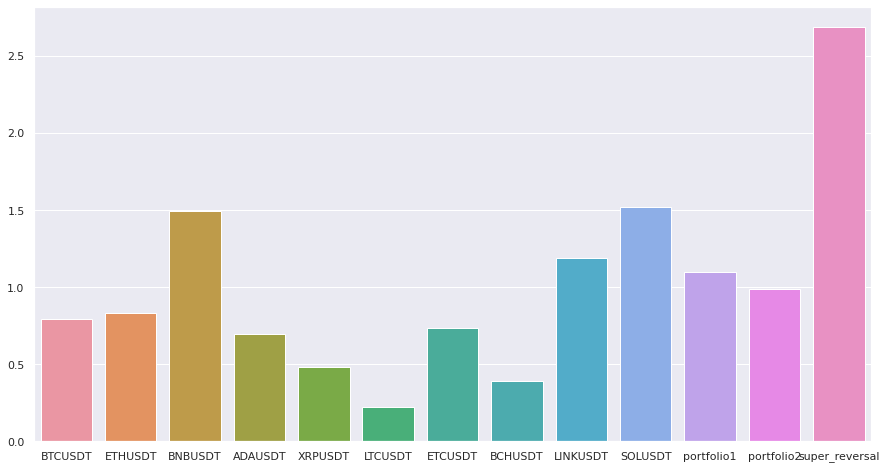

In [ ]:
print("-- Sharpe Ratio --")
data = {}
for asset in df_list:
    df = df_list[asset]
    sharpe_ratio = 365**0.5 * (df["daily_return_pct"].mean() / df["daily_return_pct"].std())
    data[asset] = sharpe_ratio
    print(f"{asset}: {round(sharpe_ratio, 2)}")

keys = list(data.keys())
vals = list(data.values())

sns.barplot(x=keys, y=vals)
print("\n")
plt.show()

<h1>Sortino Ration</h1>

-- Sortino Ratio --
BTCUSDT: 1.07
ETHUSDT: 1.15
BNBUSDT: 2.35
ADAUSDT: 1.1
XRPUSDT: 0.78
LTCUSDT: 0.32
ETCUSDT: 1.09
BCHUSDT: 0.54
LINKUSDT: 1.87
SOLUSDT: 2.59
portfolio1: 1.42
portfolio2: 1.24
super_reversal: 4.22




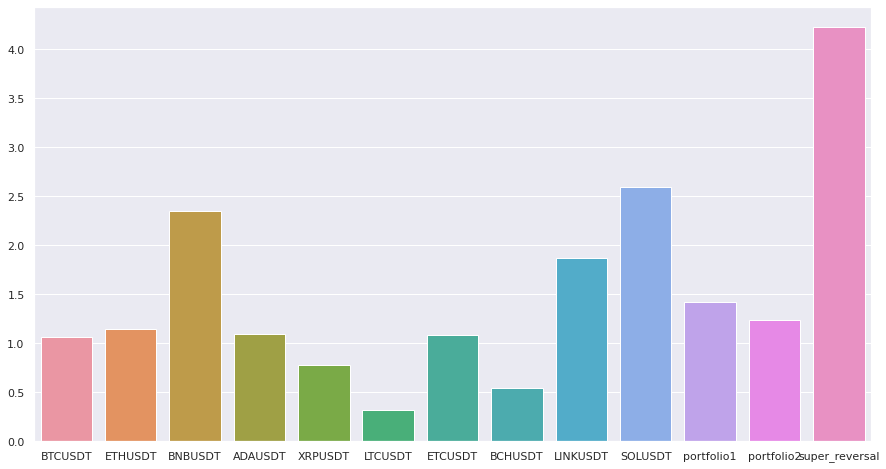

In [ ]:
print("-- Sortino Ratio --")
data = {}
for asset in df_list:
    df = df_list[asset]
    sortino_ratio = 365**0.5 * (df["daily_return_pct"].mean() / df["daily_return_pct"][df["daily_return_pct"] < 0].std())
    data[asset] = sortino_ratio
    print(f"{asset}: {round(sortino_ratio, 2)}")

keys = list(data.keys())
vals = list(data.values())

sns.barplot(x=keys, y=vals)
print("\n")
plt.show()

<h1>Drawdown</h1>

-- Drawdown --
BTCUSDT: 0.83
ETHUSDT: 0.94
BNBUSDT: 0.8
ADAUSDT: 0.94
XRPUSDT: 0.85
LTCUSDT: 0.93
ETCUSDT: 0.9
BCHUSDT: 0.94
LINKUSDT: 0.89
SOLUSDT: 0.89
portfolio1: 0.84
portfolio2: 0.78
super_reversal: 0.24




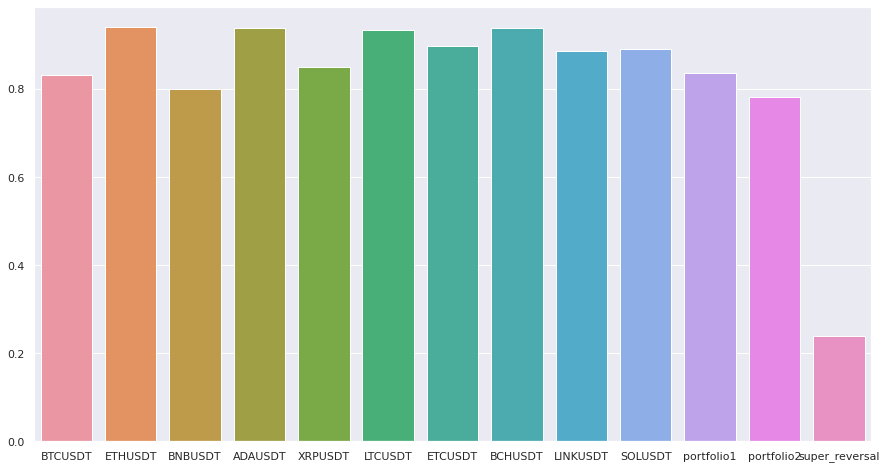

In [ ]:
print("-- Drawdown --")
data = {}
for asset in df_list:
    df = df_list[asset]
    df["ath"] = df["close"].cummax()
    df["drawdown"] = (df["close"] - df["ath"]) / df["ath"]
    max_drawdown = abs(df["drawdown"].min())
    data[asset] = max_drawdown
    print(f"{asset}: {round(max_drawdown, 2)}")

keys = list(data.keys())
vals = list(data.values())

sns.barplot(x=keys, y=vals)
print("\n")
plt.show()

-- Calmar Ratio --
BTCUSDT: 0.75
ETHUSDT: 0.89
BNBUSDT: 2.26
ADAUSDT: 0.83
XRPUSDT: 0.68
LTCUSDT: 0.25
ETCUSDT: 0.96
BCHUSDT: 0.48
LINKUSDT: 1.73
SOLUSDT: 2.59
portfolio1: 1.09
portfolio2: 0.97
super_reversal: 5.06




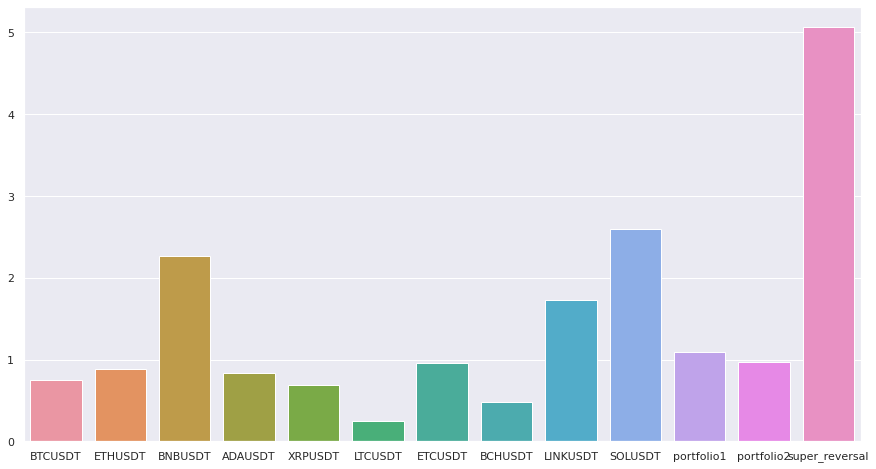

In [ ]:
print("-- Calmar Ratio --")
data = {}
for asset in df_list:
    df = df_list[asset]
    df["ath"] = df["close"].cummax()
    df["drawdown"] = (df["close"] - df["ath"]) / df["ath"]
    max_drawdown = abs(df["drawdown"].min())
    calmar_ratio = (df["daily_return_pct"].mean()*365) / max_drawdown
    data[asset] = calmar_ratio
    print(f"{asset}: {round(calmar_ratio, 2)}")

keys = list(data.keys())
vals = list(data.values())

sns.barplot(x=keys, y=vals)
print("\n")
plt.show()